In [ ]:
from google.colab import files
nift_50_data = files.upload()

Saving NSEI_NIFTY50.csv to NSEI_NIFTY50.csv


In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=ae0d4bfe093029870bb86765c924c4f88e58ccd38bde271373e69584836f1ec8
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import pandas as pd
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report
from datetime import datetime
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import ta

In [ ]:
# import yfinance as yf
# import pandas as pd

# # Specify the desired period
# start_date = '2023-01-01'
# end_date = '2024-03-17'  # Current date (adjust as needed)

# # Download the Nifty 50 data
# ticker = '^NSEBANK'  # Ticker symbol for Nifty 50
# data = yf.download(ticker, start=start_date, end=end_date, interval='1h')

# # Handle potential errors
# if data.empty:
#     print("Error: No data could be downloaded. Check your ticker, dates, and internet connection.")
# else:
#     # Preprocess the data if needed (optional)
#     data.dropna(inplace=True)  # Remove rows with missing values

#     # Save the data to a CSV file
#     data.to_csv('nifty50_hourlyy.csv')

#     print("Nifty 50 hourly data downloaded successfully!")

[*********************100%%**********************]  1 of 1 completed

Nifty 50 hourly data downloaded successfully!


In [ ]:
nifty_hourly_trend = pd.read_csv("NSEI_NIFTY50.csv")

In [ ]:
nifty_hourly_trend.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2024-03-11,22517.500000,22526.599609,22307.250000,22332.650391,22332.650391,277900.0
1231,2024-03-12,22334.449219,22452.550781,22256.000000,22335.699219,22335.699219,299200.0
1232,2024-03-13,22432.199219,22446.750000,21905.650391,21997.699219,21997.699219,493300.0
1233,2024-03-14,21982.550781,22204.599609,21917.500000,22146.650391,22146.650391,426700.0
1234,2024-03-15,22064.849609,22120.900391,21931.699219,22023.349609,22023.349609,661500.0


In [ ]:
nifty_hourly_trend.shape

(1235, 7)

In [ ]:
nifty_hourly_trend.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,15428.062493,15502.759927,15325.342558,15417.190278,15417.190278,4.192023e+05
std,3466.131875,3465.468424,3466.256167,3468.226332,3468.226332,2.181835e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,11904.200195,11946.200195,11823.200195,11895.450195,11895.450195,2.572000e+05
50%,16126.200195,16248.549805,16003.849609,16167.099609,16167.099609,3.508000e+05
75%,17947.949219,18034.250000,17847.599609,17938.400391,17938.400391,5.537000e+05
max,22517.500000,22526.599609,22430.000000,22493.550781,22493.550781,1.811000e+06


In [ ]:
nifty_hourly_trend.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [ ]:
nifty_hourly_trend_ta = ta.add_all_ta_features(nifty_hourly_trend, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
nifty_hourly_trend_ta.head()

,Date,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2019-03-18,11473.849609,11530.150391,11412.500000,11462.200195,11462.200195,320300.0,-49685.132966,320300.0,-0.155121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11462.200195,0.000000,0.000000,0.000000
1,2019-03-19,11500.299805,11543.849609,11451.250000,11532.400391,11532.400391,326100.0,195775.433885,646400.0,0.302870,...,0.048834,0.009767,0.039067,0.144258,0.028852,0.115406,11494.695605,0.612450,0.610582,0.612450
2,2019-03-20,11553.349609,11556.099609,11503.099609,11521.049805,11521.049805,366300.0,77594.558217,280100.0,0.076621,...,0.078615,0.023536,0.055078,1.242418,0.271565,0.970853,11506.794524,-0.098423,-0.098472,0.513423
3,2019-03-22,11549.200195,11572.799805,11434.549805,11456.900391,11456.900391,386200.0,-183733.162388,-106100.0,-0.131341,...,0.056460,0.030121,0.026339,2.543520,0.725956,1.817564,11483.443206,-0.556802,-0.558358,-0.046237
4,2019-03-25,11395.650391,11395.650391,11311.599609,11354.250000,11354.250000,294500.0,-179353.369705,-400600.0,-0.105913,...,-0.032961,0.017505,-0.050466,1.332376,0.847240,0.485136,11422.815720,-0.895970,-0.900008,-0.941793


In [ ]:
nifty_hourly_trend_ta = nifty_hourly_trend_ta.dropna()

In [ ]:
nifty_hourly_trend_ta.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
                    ..
momentum_pvo_hist    0
momentum_kama        0
others_dr            0
others_dlr           0
others_cr            0
Length: 93, dtype: int64

In [ ]:
nifty_hourly_trend_ta["close_daily_shifted"] = 0
nifty_hourly_trend_ta['close_daily_shifted'] = nifty_hourly_trend_ta['Close'].shift(periods=-1)
nifty_hourly_trend_ta[['Close','close_daily_shifted']].head()

,Close,close_daily_shifted
0,11462.200195,11532.400391
1,11532.400391,11521.049805
2,11521.049805,11456.900391
3,11456.900391,11354.250000
4,11354.250000,11483.250000


In [ ]:
nifty_hourly_trend_ta['close_1day_3prcnt_up'] = 0
nifty_hourly_trend_ta['close_1day_3prcnt_up'].loc[((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))>1.03] = 1

nifty_hourly_trend_ta[['close_1day_3prcnt_up']].value_counts()

close_1day_3prcnt_up
0                       1219
1                         14
Name: count, dtype: int64

In [ ]:
nifty_hourly_trend_ta['close_1day_2prcnt_up'] = 0
nifty_hourly_trend_ta['close_1day_2prcnt_up'].loc[((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))>1.02] = 1

nifty_hourly_trend_ta[['close_1day_2prcnt_up']].value_counts()

close_1day_2prcnt_up
0                       1198
1                         35
dtype: int64

In [ ]:
nifty_hourly_trend_ta['close_1day_1prcnt_up'] = 0
nifty_hourly_trend_ta['close_1day_1prcnt_up'].loc[((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))>1.01] = 1

nifty_hourly_trend_ta[['close_1day_1prcnt_up']].value_counts()

close_1day_1prcnt_up
0                       1066
1                        167
dtype: int64

In [ ]:
nifty_hourly_trend_ta['close_1day_0.5prcnt_up'] = 0
nifty_hourly_trend_ta['close_1day_0.5prcnt_up'].loc[((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))>1.005] = 1

nifty_hourly_trend_ta[['close_1day_0.5prcnt_up']].value_counts()

close_1day_0.5prcnt_up
0                         841
1                         392
dtype: int64

In [ ]:
nifty_hourly_trend_ta['close_1day_3prcnt_down'] = 0
nifty_hourly_trend_ta['close_1day_3prcnt_down'].loc[((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))<=0.97] = 1

nifty_hourly_trend_ta[['close_1day_3prcnt_down']].value_counts()

close_1day_3prcnt_down
0                         1217
1                           16
dtype: int64

In [ ]:
nifty_hourly_trend_ta['close_1day_2prcnt_down'] = 0
nifty_hourly_trend_ta['close_1day_2prcnt_down'].loc[((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))<=0.98] = 1

nifty_hourly_trend_ta[['close_1day_2prcnt_down']].value_counts()

close_1day_2prcnt_down
0                         1192
1                           41
dtype: int64

In [ ]:
nifty_hourly_trend_ta['close_1day_1prcnt_down'] = 0
nifty_hourly_trend_ta['close_1day_1prcnt_down'].loc[((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))<=0.99] = 1

nifty_hourly_trend_ta[['close_1day_1prcnt_down']].value_counts()

close_1day_1prcnt_down
0                         1090
1                          143
dtype: int64

In [ ]:
nifty_hourly_trend_ta['close_1day_0.5prcnt_down'] = 0
nifty_hourly_trend_ta['close_1day_0.5prcnt_down'].loc[((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))<=0.995] = 1

nifty_hourly_trend_ta[['close_1day_0.5prcnt_down']].value_counts()

close_1day_0.5prcnt_down
0                           939
1                           294
dtype: int64

In [ ]:
nifty_hourly_trend_ta['sidewards'] = 0
nifty_hourly_trend_ta['sidewards'].loc[(((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))>=0.9975)&(((nifty_hourly_trend_ta['close_daily_shifted'])/(nifty_hourly_trend_ta['Close']))<=1.0025)] = 1

nifty_hourly_trend_ta[['sidewards']].value_counts()

sidewards
0            946
1            287
dtype: int64

In [ ]:
nifty_hourly_trend_ta = nifty_hourly_trend_ta.drop(['others_dr','others_dlr','others_cr'],axis=1)
nifty_hourly_trend_ta.shape

(1233, 100)

In [ ]:
nifty_hourly_trend_ta_xbase = nifty_hourly_trend_ta.copy().drop(['sidewards','close_1day_0.5prcnt_down','close_1day_1prcnt_down','close_1day_2prcnt_down',
'close_1day_3prcnt_down','close_1day_0.5prcnt_up','close_1day_1prcnt_up','close_1day_2prcnt_up','close_1day_3prcnt_up','Date','close_daily_shifted',
'close_daily_shifted'],axis=1)
nifty_hourly_trend_ta_ybase = nifty_hourly_trend_ta.copy()['sidewards']
x_train, x_test, y_train, y_test = train_test_split(nifty_hourly_trend_ta_xbase, nifty_hourly_trend_ta_ybase, test_size=0.20, random_state=42)
num_cols = nifty_hourly_trend_ta_xbase.columns
#'open_1day_3prcnt_down','open_1day_2prcnt_down','open_1day_1prcnt_down','open_daily_shifted'

In [ ]:
num_cols = nifty_hourly_trend_ta_xbase.columns

In [ ]:
scaler =  MinMaxScaler() #StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama
814,0.539518,0.535457,0.544118,0.552639,0.552639,0.168029,0.714831,0.706333,0.438160,0.724529,...,0.881531,0.632922,0.701424,0.719806,0.663823,0.625991,0.556184,0.415010,0.610321,0.568834
88,0.241663,0.219365,0.240382,0.240468,0.240468,0.266648,0.110664,0.021864,0.150869,0.680554,...,0.060235,0.603608,0.573018,0.695832,0.694461,0.497864,0.608543,0.576961,0.508623,0.579388
843,0.680680,0.673739,0.685718,0.686340,0.686340,0.000000,0.780395,0.774456,0.918169,0.764255,...,0.997038,0.965153,0.780977,0.977486,0.960504,0.623390,0.388269,0.487747,0.199033,0.568834
1127,0.798540,0.795533,0.801332,0.799695,0.799695,0.091165,0.880863,0.875268,0.320325,0.706602,...,0.203264,0.672647,0.601591,0.779021,0.777876,0.524277,0.294670,0.272492,0.288353,0.568834
1143,0.766380,0.761226,0.767196,0.764541,0.764541,0.107178,0.866489,0.850639,0.266499,0.694218,...,0.144539,0.548694,0.563945,0.719213,0.720668,0.499200,0.357961,0.228839,0.463599,0.568834


In [ ]:
x_test[num_cols] = scaler.transform(x_test[num_cols])
x_test[num_cols].head()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama
356,0.273461,0.253004,0.252064,0.253791,0.253791,0.757482,0.092342,0.316055,0.284232,0.652966,...,0.402918,0.783502,0.655513,0.897312,0.901014,0.551863,0.667791,0.473923,0.750104,0.568834
547,0.543807,0.530338,0.545344,0.546240,0.546240,0.208835,0.566211,0.759609,0.568537,0.761997,...,0.963161,0.870993,0.713912,0.921144,0.898844,0.616884,0.324554,0.223422,0.406541,0.568834
804,0.514083,0.502755,0.512414,0.520039,0.520039,0.143567,0.697370,0.703253,0.315206,0.673408,...,0.097908,0.532029,0.488215,0.648617,0.668021,0.436798,0.397010,0.248297,0.513944,0.568834
49,0.285381,0.274497,0.292091,0.300894,0.300894,0.174103,0.160263,0.072889,0.355306,0.759172,...,0.991846,0.774269,0.786412,0.870780,0.822444,0.657978,0.513921,0.533549,0.381973,0.932878
975,0.665625,0.658493,0.664929,0.665242,0.665242,0.132965,0.817689,0.747245,0.529328,0.700735,...,0.076274,0.677742,0.616796,0.758223,0.745503,0.543062,0.310451,0.289526,0.297279,0.568834


In [ ]:
x_train_subset = x_train[0:].copy()
y_train_subset = y_train[0:].copy()

print("x_train_subset shape:",x_train_subset.shape)
print("y_train_subset shape:",y_train_subset.shape)

x_train_subset shape: (986, 89)
y_train_subset shape: (986,)


In [ ]:
x_train_subset.head(2)

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama
814,0.539518,0.535457,0.544118,0.552639,0.552639,0.168029,0.714831,0.706333,0.438160,0.724529,...,0.881531,0.632922,0.701424,0.719806,0.663823,0.625991,0.556184,0.415010,0.610321,0.568834
88,0.241663,0.219365,0.240382,0.240468,0.240468,0.266648,0.110664,0.021864,0.150869,0.680554,...,0.060235,0.603608,0.573018,0.695832,0.694461,0.497864,0.608543,0.576961,0.508623,0.579388


In [ ]:
y_train_subset.value_counts()

0    761
1    225
Name: sidewards, dtype: int64

In [ ]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)

In [ ]:
x_train_subset.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
                      ..
momentum_ppo_hist      0
momentum_pvo           0
momentum_pvo_signal    0
momentum_pvo_hist      0
momentum_kama          0
Length: 89, dtype: int64

In [ ]:
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_subset,y_train_subset)

In [ ]:
x_test.shape

(247, 89)

In [ ]:
x_test_balanced, y_test_balanced = smote.fit_resample(x_test,y_test)

In [ ]:
print('y_train_balanced.value_counts():\n',y_train_balanced.value_counts())
print("\n")

print('y_test_balanced.value_counts():\n',y_test_balanced.value_counts())

y_train_balanced.value_counts():
 1    761
0    761
Name: sidewards, dtype: int64


y_test_balanced.value_counts():
 0    185
1    185
Name: sidewards, dtype: int64


In [ ]:
print('x_train_balanced.shape:',x_train_balanced.shape)
print('y_train_balanced.shape:',y_train_balanced.shape)

print('x_test_balanced.shape:',x_test_balanced.shape)
print('y_test_balanced.shape:',y_test_balanced.shape)

x_train_balanced.shape: (1522, 89)
y_train_balanced.shape: (1522,)
x_test_balanced.shape: (370, 89)
y_test_balanced.shape: (370,)


In [ ]:
#remerging dataset for shuffling.
balanced_training_set = x_train_balanced.copy()
balanced_training_set["target_variable"] = 0
balanced_training_set["target_variable"] = y_train_balanced.copy()

In [ ]:
balanced_training_set.tail()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,target_variable
1517,0.547238,0.535856,0.549348,0.549310,0.549310,0.186263,0.577631,0.758540,0.498391,0.723219,...,0.752902,0.637750,0.846573,0.851408,0.532950,0.291858,0.128402,0.462435,0.568834,1
1518,0.654106,0.657218,0.656857,0.669168,0.669168,0.179444,0.717420,0.805338,0.757462,0.734433,...,0.898090,0.669941,0.937641,0.953050,0.539104,0.537286,0.445633,0.536088,0.568834,1
1519,0.813654,0.811738,0.815902,0.818778,0.818778,0.107463,0.878818,0.872892,0.362973,0.741331,...,0.760232,0.701590,0.816930,0.771302,0.634588,0.431259,0.331123,0.476203,0.568834,1
1520,0.645342,0.643807,0.644966,0.648856,0.648856,0.142328,0.686078,0.815486,0.487155,0.713484,...,0.615945,0.627315,0.747335,0.735296,0.538038,0.457624,0.433820,0.398655,0.568834,1
1521,0.766730,0.760113,0.765462,0.763544,0.763544,0.175110,0.859192,0.824928,0.503728,0.733398,...,0.834097,0.716853,0.875421,0.856142,0.595433,0.508327,0.395378,0.543369,0.568834,1


In [ ]:
#Shuffling dataset
balanced_training_set = balanced_training_set.sample(frac=1).reset_index(drop=True)

In [ ]:
balanced_training_set.head()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,target_variable
0,0.260118,0.245379,0.267375,0.272225,0.272225,0.471231,0.148318,0.075151,0.436524,0.796063,...,0.770494,0.672586,0.861191,0.832478,0.611625,0.506437,0.520992,0.383318,0.379385,0
1,0.282770,0.263580,0.288555,0.287184,0.287184,0.284042,0.122655,0.163174,0.315992,0.723453,...,0.766830,0.647020,0.880054,0.890375,0.531689,0.341570,0.349066,0.282562,0.568834,0
2,0.226146,0.203658,0.211857,0.220529,0.220529,0.630599,0.134040,0.102199,0.207525,0.459618,...,0.513652,0.440045,0.611949,0.644338,0.396316,0.801469,0.643567,0.794137,0.568834,1
3,0.255730,0.236887,0.262309,0.261524,0.261524,0.080144,0.125223,0.331595,0.387266,0.733988,...,0.726462,0.642295,0.840987,0.840666,0.542509,0.290893,0.354776,0.178662,0.568834,1
4,0.302185,0.282791,0.308607,0.307207,0.307207,0.167918,0.126692,0.191455,0.435498,0.723162,...,0.735125,0.655954,0.840211,0.834092,0.555038,0.219778,0.182943,0.256845,0.568834,0


In [ ]:
X = balanced_training_set.drop(['target_variable'],axis=1)# x_train_subset
target = balanced_training_set["target_variable"].copy() #y_train_subset

In [ ]:
X_rfecv = X[0:30000].copy()
target_rfecv = target[0:30000].copy()

In [ ]:
rfc =  RandomForestClassifier(random_state=101) #choosing class_weight parameter as "balanced" as it is the target variable is highly imbalanced
rfecv2 = RFECV(estimator=rfc, step=5, cv=StratifiedKFold(3), scoring='precision',min_features_to_select = 10,n_jobs=-1) #Increasing number of jobs for parallelism and increasing feature seletion speed
rfecv2.fit(X_rfecv, target_rfecv)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101),
      min_features_to_select=10, n_jobs=-1, scoring='precision', step=5)

In [ ]:
print('Optimal number of features: {}'.format(rfecv2.n_features_))

Optimal number of features: 29


In [ ]:
print(np.where(rfecv2.support_ == False)[0])
#X = x_train_balanced

X.drop(X.columns[np.where(rfecv2.support_ == False)[0]], axis=1, inplace=True)

[ 0  1  2  3  4  8 13 15 16 17 20 21 22 23 24 25 28 29 30 31 32 34 35 37
 38 39 40 41 42 43 45 50 51 52 53 54 55 56 58 59 60 62 63 65 66 67 68 69
 70 72 74 75 77 78 79 80 82 84 87 88]


In [ ]:
x_test_balanced.drop(x_test_balanced.columns[np.where(rfecv2.support_ == False)[0]], axis=1, inplace=True)

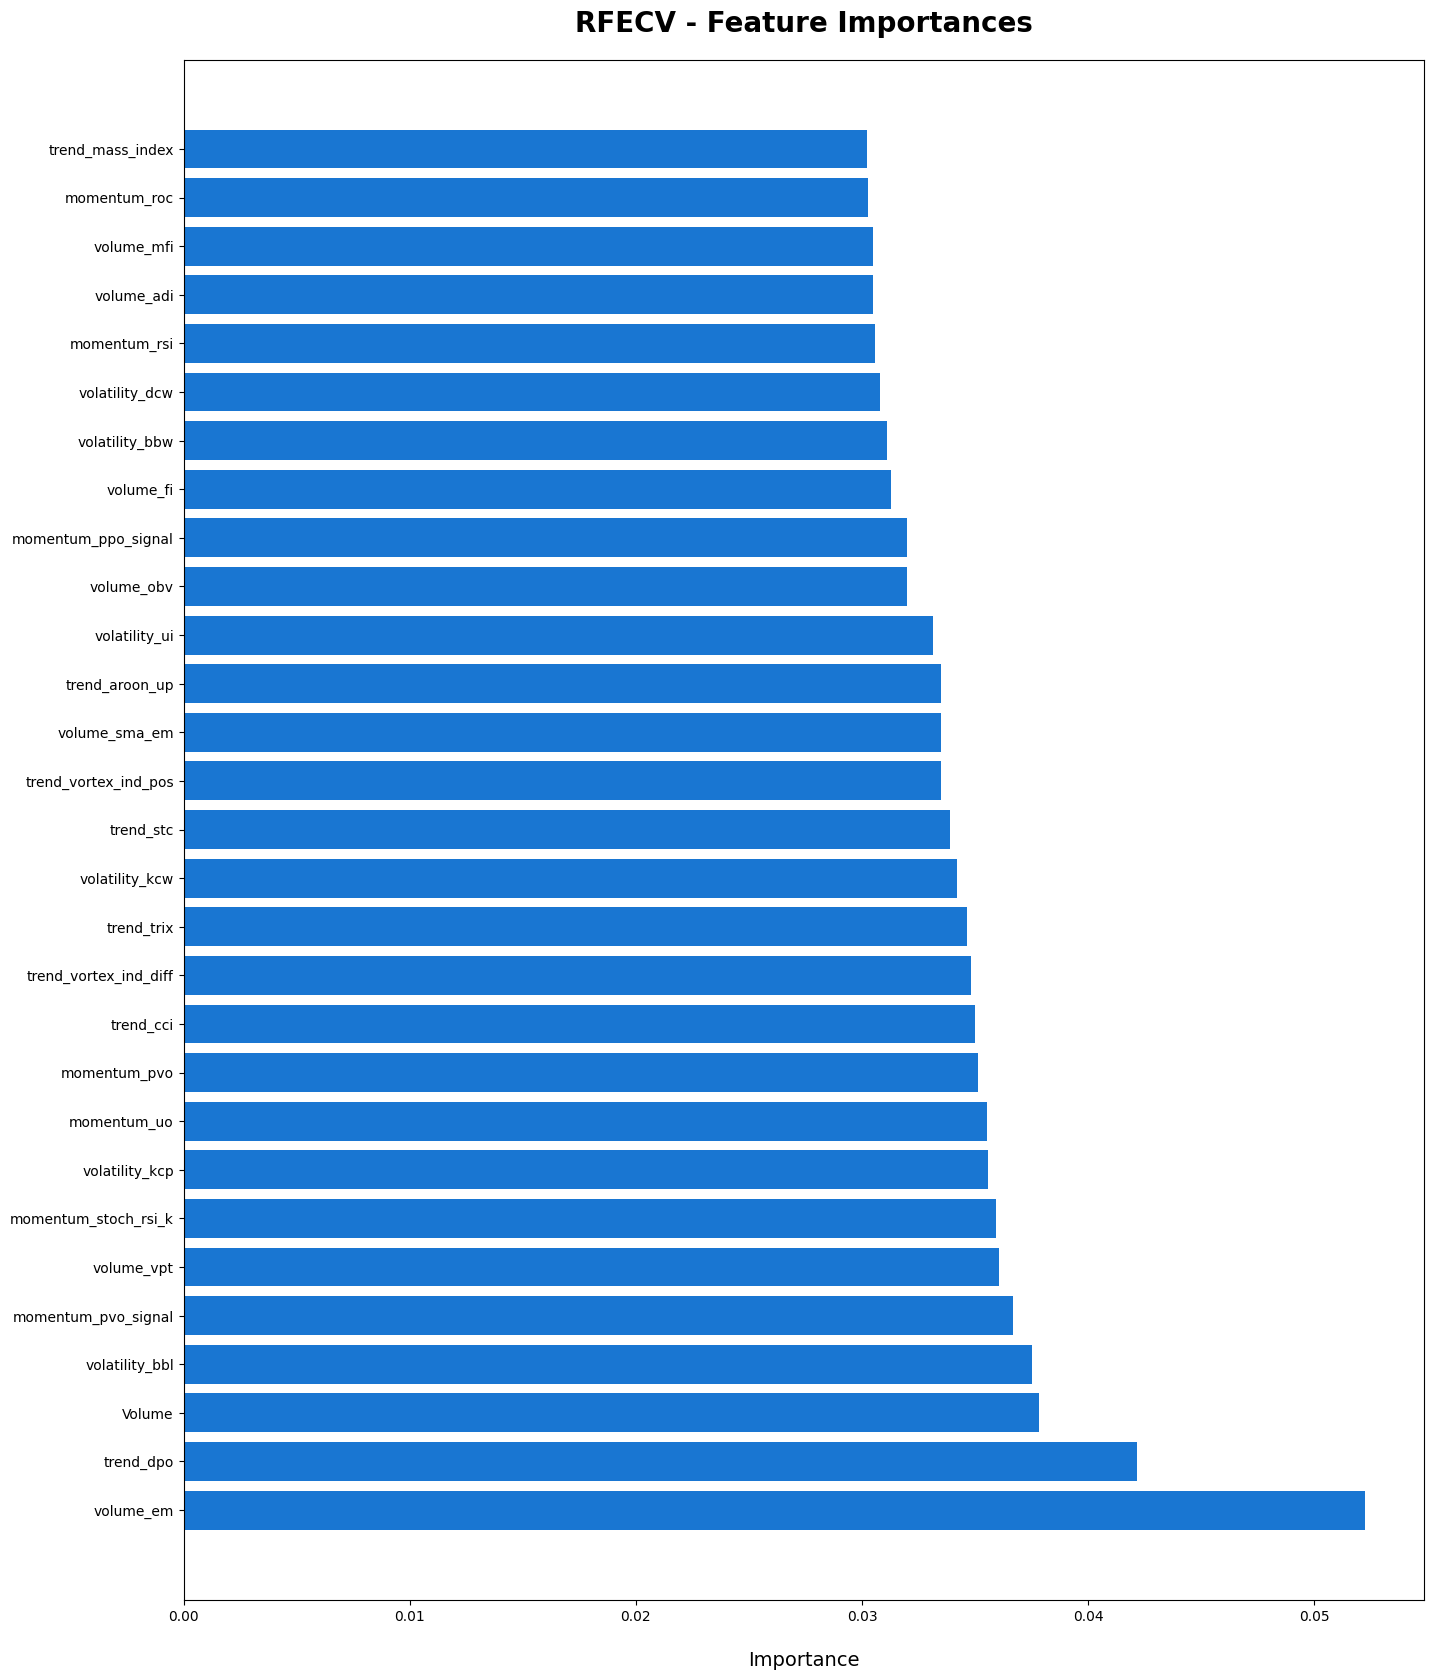

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv2.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 20))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
X.shape

(1522, 29)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(target,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.640049
         Iterations 8
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   target_variable    Pseudo R-squared:   0.077     
Date:                 2024-03-17 18:04   AIC:                2006.3087 
No. Observations:     1522               BIC:                2160.8144 
Df Model:             28                 Log-Likelihood:     -974.15   
Df Residuals:         1493               LL-Null:            -1055.0   
Converged:            1.0000             LLR p-value:        9.5577e-21
No. Iterations:       8.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
Volume                 -1.2474   1.0236 -1.2187 0.2230  -3.2536

In [ ]:
vif_estimation_data_frame = add_constant(X)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i)
               for i in range(vif_estimation_data_frame.shape[1])],
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)

#renaming dataframe column for better interpretability
vif_df.rename(columns = {0:'vif_value'}, inplace = True)

#converting indexs (column names) into a dataframe columns
vif_df = vif_df.reset_index()
vif_df.head()
#renaming newly creating index column for better interpretability
vif_df.rename(columns = {'index':'col_names'}, inplace = True)
vif_df = vif_df.sort_values(by='vif_value',ascending=False)
vif_df.head(10)

,col_names,vif_value
0,const,4258.384536
2,volume_adi,48.741144
9,volatility_bbl,39.099722
13,volatility_dcw,31.349257
16,trend_vortex_ind_diff,25.805247
10,volatility_bbw,24.981523
3,volume_obv,21.778802
15,trend_vortex_ind_pos,20.547073
14,volatility_ui,17.330408
23,momentum_rsi,17.212130


In [ ]:
X_vif_treated = X.copy().drop(['trend_vortex_ind_pos','volatility_bbw','momentum_ppo_signal','momentum_pvo_signal','volatility_kcw','trend_mass_index','momentum_roc',
'momentum_uo','trend_trix','Volume','momentum_pvo','volume_adi','volatility_bbl','momentum_rsi','trend_vortex_ind_diff','volume_vpt'],axis=1)


In [ ]:
vif_estimation_data_frame = add_constant(X_vif_treated)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i)
               for i in range(vif_estimation_data_frame.shape[1])],
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)

#renaming dataframe column for better interpretability
vif_df.rename(columns = {0:'vif_value'}, inplace = True)

#converting indexs (column names) into a dataframe columns
vif_df = vif_df.reset_index()
vif_df.head()
#renaming newly creating index column for better interpretability
vif_df.rename(columns = {'index':'col_names'}, inplace = True)
vif_df = vif_df.sort_values(by='vif_value',ascending=False)
vif_df.head(20)

,col_names,vif_value
0,const,1712.376129
6,volatility_kcp,7.211069
8,volatility_ui,6.892323
11,trend_cci,6.834545
13,momentum_stoch_rsi_k,5.346067
7,volatility_dcw,4.863813
10,trend_stc,3.661902
5,volume_mfi,2.828747
12,trend_aroon_up,2.503209
2,volume_fi,2.352449


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(target,X_vif_treated) #method='bfgs'
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.651478
         Iterations 9
                            Results: Logit
Model:                 Logit             Method:            MLE       
Dependent Variable:    target_variable   Pseudo R-squared:  0.060     
Date:                  2024-03-17 18:30  AIC:               2009.0977 
No. Observations:      1522              BIC:               2078.3589 
Df Model:              12                Log-Likelihood:    -991.55   
Df Residuals:          1509              LL-Null:           -1055.0   
Converged:             1.0000            LLR p-value:       2.6521e-21
No. Iterations:        9.0000            Scale:             1.0000    
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
volume_obv            -0.0729   0.1897 -0.3843 0.7008  -0.4446  0.2989
vol

In [ ]:
x_test_vif_treated = x_test_balanced.copy().drop(['trend_vortex_ind_pos','volatility_bbw','momentum_ppo_signal','momentum_pvo_signal','volatility_kcw','trend_mass_index','momentum_roc',
'momentum_uo','trend_trix','Volume','momentum_pvo','volume_adi','volatility_bbl','momentum_rsi','trend_vortex_ind_diff','volume_vpt'],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
sklearn_logit_model = LogisticRegression(random_state=0).fit(X_vif_treated, target)

from sklearn.metrics import r2_score
y_predict = sklearn_logit_model.predict(x_test_vif_treated)
print(r2_score(y_test_balanced, y_predict))

-0.5675675675675675


In [ ]:
print(classification_report(y_test_balanced,y_predict))
print(confusion_matrix(y_test_balanced,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       185
           1       0.60      0.64      0.62       185

    accuracy                           0.61       370
   macro avg       0.61      0.61      0.61       370
weighted avg       0.61      0.61      0.61       370

[[107  78]
 [ 67 118]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_vif_treated, target)

# performing predictions on the test dataset
y_pred = clf.predict(x_test_vif_treated)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))


ACCURACY OF THE MODEL:  0.6


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       185
           1       0.67      0.40      0.50       185

    accuracy                           0.60       370
   macro avg       0.62      0.60      0.58       370
weighted avg       0.62      0.60      0.58       370

[[148  37]
 [111  74]]


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
# fit the model
model.fit(X_vif_treated, target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(x_test_vif_treated)


# get importance
importance = model.feature_importances_

In [ ]:
# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))


ACCURACY OF THE MODEL:  0.6054054054054054


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.81      0.67       185
           1       0.68      0.41      0.51       185

    accuracy                           0.61       370
   macro avg       0.63      0.61      0.59       370
weighted avg       0.63      0.61      0.59       370

[[149  36]
 [110  75]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [ ]:
model = KNeighborsClassifier()
model.fit(X_vif_treated, target)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test_vif_treated)

In [ ]:
# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))


ACCURACY OF THE MODEL:  0.5324324324324324


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.54      0.54       185
           1       0.53      0.52      0.53       185

    accuracy                           0.53       370
   macro avg       0.53      0.53      0.53       370
weighted avg       0.53      0.53      0.53       370

[[100  85]
 [ 88  97]]


In [ ]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(15, activation='relu', input_shape=(13,)))

# Add one hidden layer
model.add(Dense(7, activation='relu'))

# Add one hidden layer
model.add(Dense(3, activation='relu'))

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
import tensorflow as tf
import keras
import keras.backend as K

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.AUC()])

model.fit(X_vif_treated, target,epochs=60, batch_size=10, verbose=1)

Epoch 1/60
153/153 [==============================] - 2s 2ms/step - loss: 0.6941 - auc: 0.4740
Epoch 2/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6932 - auc: 0.4963
Epoch 3/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6923 - auc: 0.5391
Epoch 4/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6901 - auc: 0.5642
Epoch 5/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6877 - auc: 0.5750
Epoch 6/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6861 - auc: 0.5690
Epoch 7/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6835 - auc: 0.5820
Epoch 8/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6823 - auc: 0.5890
Epoch 9/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6812 - auc: 0.5892
Epoch 10/60
153/153 [==============================] - 0s 2ms/step - loss: 0.6800 - auc: 0.5863
Epoch 11/60
153/153 [============================

In [ ]:
y_pred = model.predict(x_test_vif_treated)

12/12 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[0.60184044],
       [0.61138064],
       [0.09672366],
       [0.3179814 ],
       [0.61138064],
       [0.35455036],
       [0.42462286],
       [0.23797347],
       [0.07602073],
       [0.57168496],
       [0.61138064],
       [0.61138064],
       [0.61138064],
       [0.61138064],
       [0.3907115 ],
       [0.41977537],
       [0.2375659 ],
       [0.3631079 ],
       [0.5949731 ],
       [0.61138064],
       [0.61138064],
       [0.61138064],
       [0.61138064],
       [0.61138064],
       [0.48186323],
       [0.61138064],
       [0.61138064],
       [0.56002665],
       [0.56539845],
       [0.30879015],
       [0.61138064],
       [0.61138064],
       [0.48480895],
       [0.32714692],
       [0.22999455],
       [0.15579443],
       [0.42480403],
       [0.14168106],
       [0.3264038 ],
       [0.27255362],
       [0.15519454],
       [0.3171011 ],
       [0.1951501 ],
       [0.61138064],
       [0.61138064],
       [0.4706854 ],
       [0.61138064],
       [0.182

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:'output_prob'}, inplace = True)

y_pred['output_prob'].loc[(y_pred['output_prob']) >0.5] = 1
y_pred['output_prob'].loc[(y_pred['output_prob']) <=0.5] = 0
y_pred.head()

,output_prob
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [ ]:
y_pred.round(0)
y_pred['output_prob'].astype(int)
y_pred.head()

,output_prob
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [ ]:
y_pred.value_counts()

output_prob
1.0            187
0.0            183
dtype: int64

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))

ACCURACY OF THE MODEL:  0.5783783783783784


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58       185
           1       0.58      0.58      0.58       185

    accuracy                           0.58       370
   macro avg       0.58      0.58      0.58       370
weighted avg       0.58      0.58      0.58       370

[[106  79]
 [ 77 108]]


In [ ]:

from sklearn.svm import SVC
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(X_vif_treated, target)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(x_test_vif_treated)

In [ ]:

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))

ACCURACY OF THE MODEL:  0.5891891891891892


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       185
           1       0.58      0.68      0.62       185

    accuracy                           0.59       370
   macro avg       0.59      0.59      0.59       370
weighted avg       0.59      0.59      0.59       370

[[ 93  92]
 [ 60 125]]
